In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
movies = pd.read_csv('dummy_data_sets/imdb.csv')

In [5]:
movies.shape

(979, 6)

In [6]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [7]:
movies.isnull().sum().sort_values(ascending = False)

content_rating    3
star_rating       0
title             0
genre             0
duration          0
actors_list       0
dtype: int64

In [8]:
movies[['title', 'duration']].sort_values('duration', ascending = False)

,title,duration
476,Hamlet,242
157,Gone with the Wind,238
78,Once Upon a Time in America,229
142,Lagaan: Once Upon a Time in India,224
445,The Ten Commandments,220
...,...,...
293,Duck Soup,68
88,The Kid,68
258,The Cabinet of Dr. Caligari,67
338,Battleship Potemkin,66


In [21]:
movies['duration'].mean()

120.97957099080695

In [22]:
movies.groupby('genre')['duration'].mean().sort_values(ascending = False)

genre
Western      136.666667
Adventure    134.840000
Biography    131.844156
Drama        126.539568
Action       126.485294
Crime        122.298387
Mystery      115.625000
Thriller     114.200000
Fantasy      112.000000
Sci-Fi       109.000000
Comedy       107.602564
Family       107.500000
Horror       102.517241
Film-Noir     97.333333
Animation     96.596774
History       66.000000
Name: duration, dtype: float64

In [9]:
over_2_hours = movies[movies['duration'] >= 120]
under_2_hours = movies[movies['duration'] < 120] 

In [10]:
over_2_hours.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [11]:
under_2_hours.head()

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."


In [12]:
print(over_2_hours['duration'].mean())
print(under_2_hours['duration'].mean())

142.4581497797357
102.40571428571428


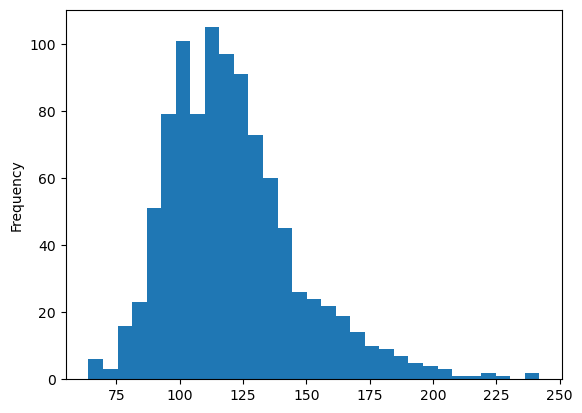

In [14]:
import math
def ideal_bins(table, column):
    return round(math.sqrt(len([row for row in table[column]])))

movies['duration'].plot(kind = 'hist', bins = ideal_bins(movies, 'duration'));

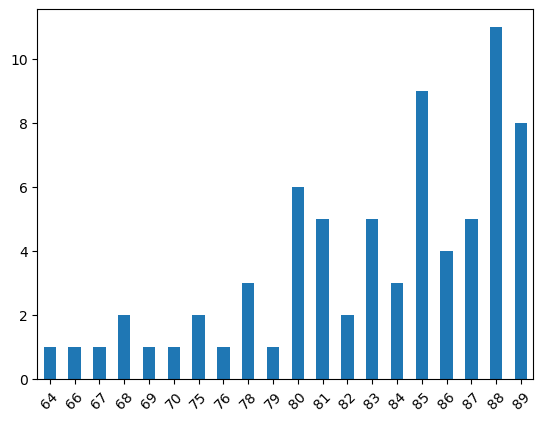

In [13]:
movies['duration'].value_counts().sort_index().head(20).plot(kind = 'bar')
plt.xticks(rotation = 45);

In [15]:
movies['content_rating'].value_counts().sort_values(ascending = False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

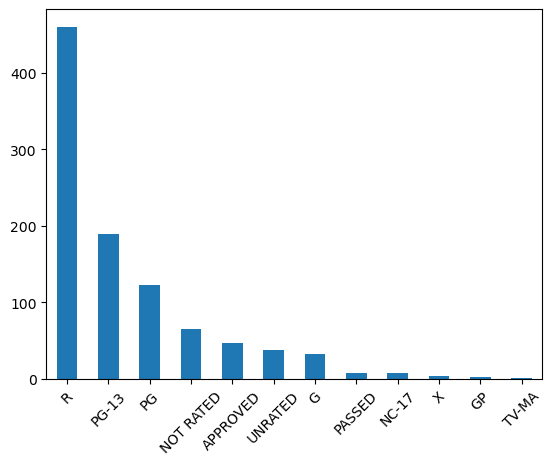

In [16]:
movies['content_rating'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 45);

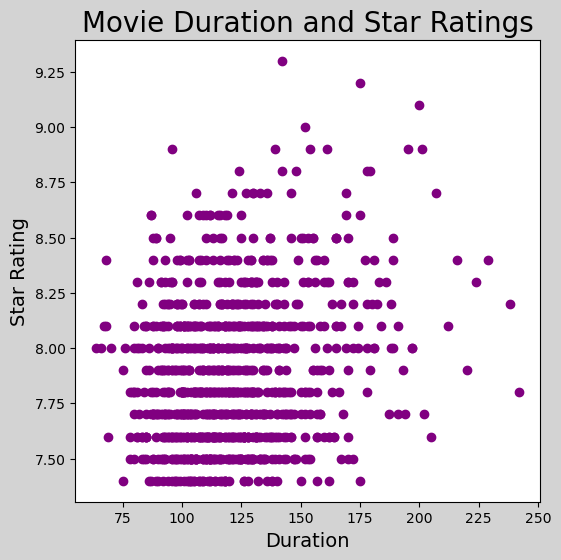

In [17]:
plt.figure(figsize=(6,6), facecolor='lightgray')

plt.scatter(x=movies['duration'], 
            y=movies['star_rating'], c='purple')

plt.title('Movie Duration and Star Ratings', size=20)
plt.xlabel('Duration', size=14)
plt.ylabel('Star Rating', size=14);

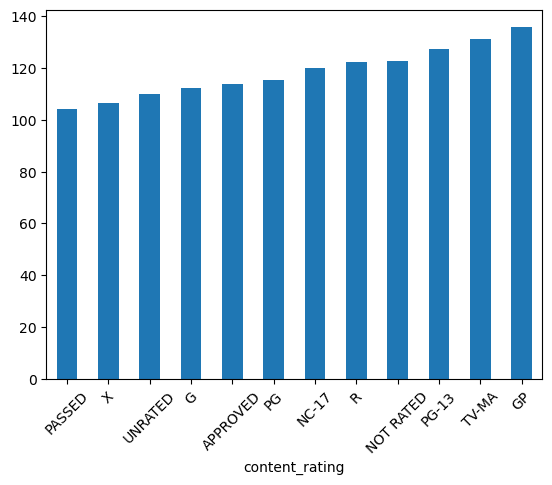

In [18]:
movies.groupby('content_rating')['duration'].mean().sort_values(ascending = True).plot(kind = 'bar')
plt.xticks(rotation = 45);

In [19]:
movies.groupby(['genre'])['star_rating'].max().sort_values(ascending = False)

genre
Crime        9.3
Action       9.0
Adventure    8.9
Biography    8.9
Drama        8.9
Western      8.9
Animation    8.6
Comedy       8.6
Horror       8.6
Mystery      8.6
Film-Noir    8.3
Sci-Fi       8.2
History      8.0
Thriller     8.0
Family       7.9
Fantasy      7.7
Name: star_rating, dtype: float64

In [20]:
duplicates = movies[movies.duplicated(['title'])]
duplicates

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
